In [54]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
files = os.listdir('data')
df = np.empty([0, 8])
for file in files:
    if "publ_2017" not in file: continue
    #arr = np.genfromtxt('data/'+file, delimiter="','")
    arr = pd.read_csv('data/'+file, delimiter="','", engine='python')
    #if arr.shape[0] == 0: continue
    df = np.concatenate((df, arr))
df = pd.DataFrame(df, columns=['publ_year', 'publ_month', 'publ_day', 'decision_date', 'number', 'subject', 'subject_desc', 'content'])
len(df)

6496

In [60]:
def transform(x):
    x['publ_year'] = int(x['publ_year'].replace("'", ""))
    x['dec_day'], x['dec_month'], x['dec_year'] = x['decision_date'].split('.')
    x['content_len'] = len(x['content'])

    return x

df = df.apply(transform, axis=1)


# Type casting, for performance
conv = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df[conv.columns] = conv

conv = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df[conv.columns] = conv
del conv

df.head(3)

#df.dtypes

# Hole Referenzen (BGE, Artikel) aus den BGE
# Score Referenzen
# Darstellen

,publ_year,publ_month,publ_day,decision_date,number,subject,subject_desc,content,dec_day,dec_month,dec_year,content_len
0,2017,1,3,08.11.2016,4A_391/2016,Diritto contrattuale,inabilità al lavoro,\n \n\xa0\nBundesgericht\xa0\nTribunal f\...,08,11,2016,17811
1,2017,1,3,05.12.2016,8C_929/2015,Assurance-accidents,Assurance-accidents,\n \n\xa0\nBundesgericht\xa0\nTribunal f\...,05,12,2016,32396
2,2017,1,3,05.12.2016,9C_557/2016,Invalidenversicherung,Invalidenversicherung,\n \n\xa0\nBundesgericht\xa0\nTribunal f\...,05,12,2016,2549


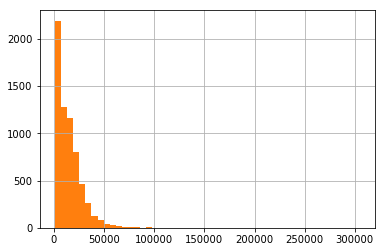

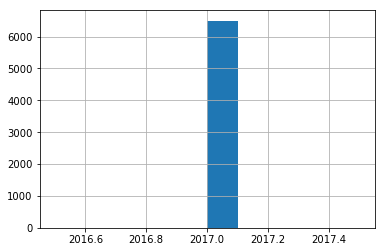

In [67]:
df['content_len'].hist(bins=50)
plt.show()

df['p'].hist()
plt.show()